# Multiple Linear Regression

In [11]:
from sklearn.datasets import fetch_california_housing

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
california = fetch_california_housing()

In [13]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [14]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

### Prepare the DataFrame

In [15]:
dataset = pd.DataFrame(california.data, columns=california.feature_names)
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [16]:
dataset['Price'] = california.target
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Cleaning and checking the valid dataset

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [18]:
dataset.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [19]:
dataset.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


### Visualization

<Axes: >

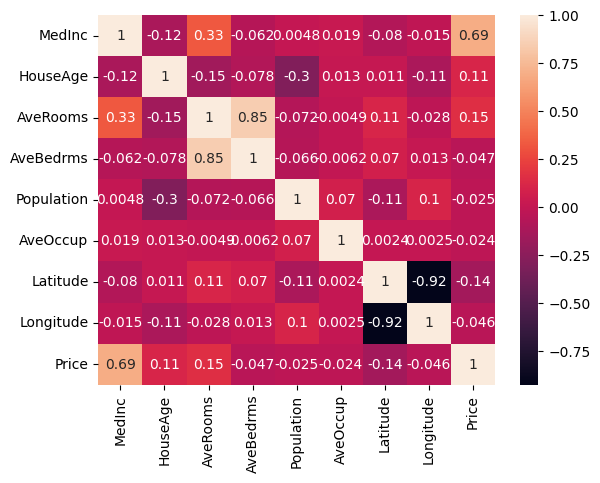

In [21]:
sns.heatmap(dataset.corr(), annot=True)

### Linear Regression

#### Divide them in Independent and Dependent Features

In [24]:
X = dataset.iloc[:,:-1] #independent features
y = dataset.iloc[:,-1] #dependent features

In [25]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [26]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: Price, dtype: float64

#### Spliting it into a training and testing Dataset

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33, random_state=43)

In [56]:
X_train.shape, y_train.shape, X_test.shape, y_train.shape

((13828, 8), (13828,), (6812, 8), (13828,))

In [57]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [58]:
X_train=scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

#### Model Training

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
regression = LinearRegression()

In [61]:
regression

LinearRegression()

In [62]:
regression.fit(X_train, y_train)

LinearRegression()

In [63]:
regression.coef_

array([ 0.79784607,  0.1111683 , -0.22860829,  0.27861239, -0.00968808,
       -0.04082795, -0.94405958, -0.90975399])

In [64]:
regression.intercept_

np.float64(2.0678036838299114)

#### Prediction for the test data

In [65]:
y_pred = regression.predict(X_test)

In [66]:
y_pred

array([1.77822814, 1.93166072, 1.5234417 , ..., 1.59438137, 1.79882667,
       1.56223197], shape=(6812,))

#### Performance Matrices

In [67]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


In [68]:
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.5096454978003823
0.530311084852499
0.7138945985230468


#### R squared and adjusted R squared

In [69]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print(score)

0.6200486859471832


#### Assumptions

Text(0, 0.5, 'Test Predicted Data')

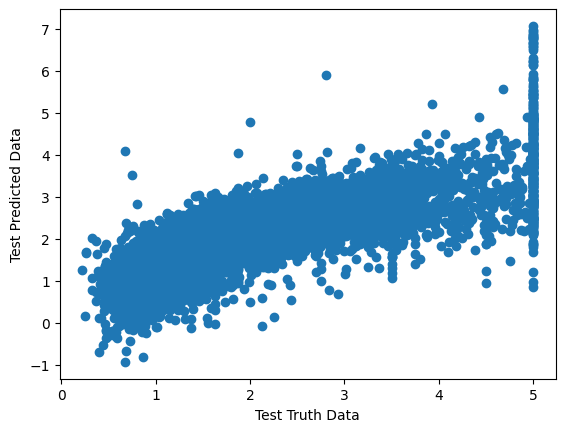

In [70]:
plt.scatter(y_test, y_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [71]:
residuals = y_test-y_pred

In [72]:
residuals

7310    -0.300228
4402     0.260339
1929     0.210558
11551   -0.062734
9882    -0.538965
           ...   
20257   -0.265708
3055    -0.444940
12741    0.000619
4271     0.576173
7541    -0.512232
Name: Price, Length: 6812, dtype: float64

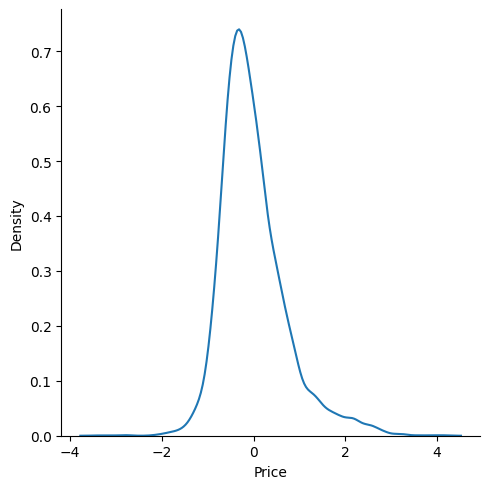

In [74]:
sns.displot(residuals,kind="kde")

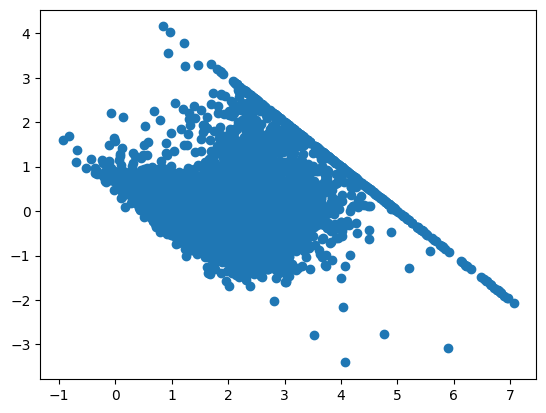

In [75]:
plt.scatter(y_pred,residuals)